In [5]:
# My F1 Race Predictor - Improved Version
# Date: 14/12/2025

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('data/processed/f1_v3_complete_features.csv')

In [7]:
print(f"Total rows: {len(data)}")
print(f"Total columns: {len(data.columns)}")
print("\nFirst few rows:")
data.head()

Total rows: 1738
Total columns: 100

First few rows:


,number,position,positionText,points,grid,laps,status,driverId,driverNumber,driverCode,...,points_gap_to_leader,races_remaining,must_win_pressure,teammate_gap,driver_consistency_score,quali_race_delta,avg_quali_race_delta,season_progress,driver_career_races,podium_finish
0,23,13,13,0.0,14,57,Finished,albon,23,ALB,...,0.0,21,0,0.0,NaN,-1,NaN,0.045455,0,0
1,23,14,14,0.0,16,47,Collision damage,albon,23,ALB,...,26.0,20,0,0.0,NaN,-2,-1.000000,0.090909,1,0
2,23,10,10,1.0,20,58,Finished,albon,23,ALB,...,45.0,19,0,0.0,0.585786,-10,-1.500000,0.136364,2,0
3,23,11,11,0.0,18,62,+1 Lap,albon,23,ALB,...,70.0,18,0,0.0,0.324500,-7,-4.333333,0.181818,3,0
4,23,9,9,2.0,18,57,Finished,albon,23,ALB,...,78.0,17,0,0.0,0.353889,-9,-5.000000,0.227273,4,0


In [8]:
# Load all data files
race_results = pd.read_csv('data/raw/race_results_2022_2025.csv')
qualifying = pd.read_csv('data/raw/qualifying_results_2022_2025.csv')
complete_features = pd.read_csv('data/processed/f1_v3_complete_features.csv')

print("="*50)
print("RACE RESULTS DATA")
print("="*50)
print(f"Rows: {len(race_results)}")
print(f"Columns: {len(race_results.columns)}")
print("\nColumn names:")
print(race_results.columns.tolist())
print("\nFirst 5 rows:")
print(race_results.head())

print("\n" + "="*50)
print("QUALIFYING DATA")
print("="*50)
print(f"Rows: {len(qualifying)}")
print(f"Columns: {len(qualifying.columns)}")
print("\nFirst 5 rows:")
print(qualifying.head())

print("\n" + "="*50)
print("COMPLETE FEATURES (What the model uses)")
print("="*50)
print(f"Rows: {len(complete_features)}")
print(f"Columns: {len(complete_features.columns)}")
print("\nAll feature names:")
print(complete_features.columns.tolist())

RACE RESULTS DATA
Rows: 1738
Columns: 28

Column names:
['number', 'position', 'positionText', 'points', 'grid', 'laps', 'status', 'driverId', 'driverNumber', 'driverCode', 'driverUrl', 'givenName', 'familyName', 'dateOfBirth', 'driverNationality', 'constructorId', 'constructorUrl', 'constructorName', 'constructorNationality', 'totalRaceTimeMillis', 'totalRaceTime', 'fastestLapRank', 'fastestLapNumber', 'fastestLapTime', 'fastestLapAvgSpeedUnits', 'fastestLapAvgSpeed', 'season', 'round']

First 5 rows:
   number  position positionText  points  grid  laps    status  \
0      16         1            1    26.0     1    57  Finished   
1      55         2            2    18.0     3    57  Finished   
2      44         3            3    15.0     5    57  Finished   
3      63         4            4    12.0     9    57  Finished   
4      20         5            5    10.0     7    57  Finished   

          driverId  driverNumber driverCode  ... constructorNationality  \
0          leclerc  

In [9]:
# Check for missing values
print("MISSING VALUES CHECK")
print("="*50)
missing = complete_features.isnull().sum()
print(missing[missing > 0])

if missing.sum() == 0:
    print("✅ No missing values! Data is clean.")
else:
    print(f"⚠️ Found {missing.sum()} missing values")

# Check data types
print("\n" + "="*50)
print("DATA TYPES")
print("="*50)
print(complete_features.dtypes)

MISSING VALUES CHECK
totalRaceTimeMillis               302
totalRaceTime                     324
fastestLapRank                     61
fastestLapNumber                   61
fastestLapTime                     61
fastestLapAvgSpeedUnits           453
fastestLapAvgSpeed                453
Q1                                 20
Q2                                451
Q3                                890
Q1_seconds                         20
Q2_seconds                        451
Q3_seconds                        890
quali_best_time                    18
quali_gap_to_pole                  18
quali_gap_to_pole_pct              18
quali_performance_score            18
quali_q1_q2_improvement           453
quali_q2_q3_improvement           890
driver_last3_avg_points            31
driver_last3_avg_position          31
driver_last5_avg_points            31
driver_last5_avg_position          31
driver_last5_podiums               31
driver_avg_finish_position         31
constructor_last3_avg_points 

TOP 10 DRIVERS BY PODIUM FINISHES
driver_full_name
Max Verstappen     62
Charles Leclerc    36
Lando Norris       36
Sergio Pérez       24
Oscar Piastri      24
George Russell     22
Carlos Sainz       22
Lewis Hamilton     20
Fernando Alonso     8
Pierre Gasly        2
Name: count, dtype: int64


C:\Users\sarva\AppData\Local\Temp\ipykernel_10784\3311938102.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  podium_data['driver_full_name'] = podium_data['givenName'] + ' ' + podium_data['familyName']


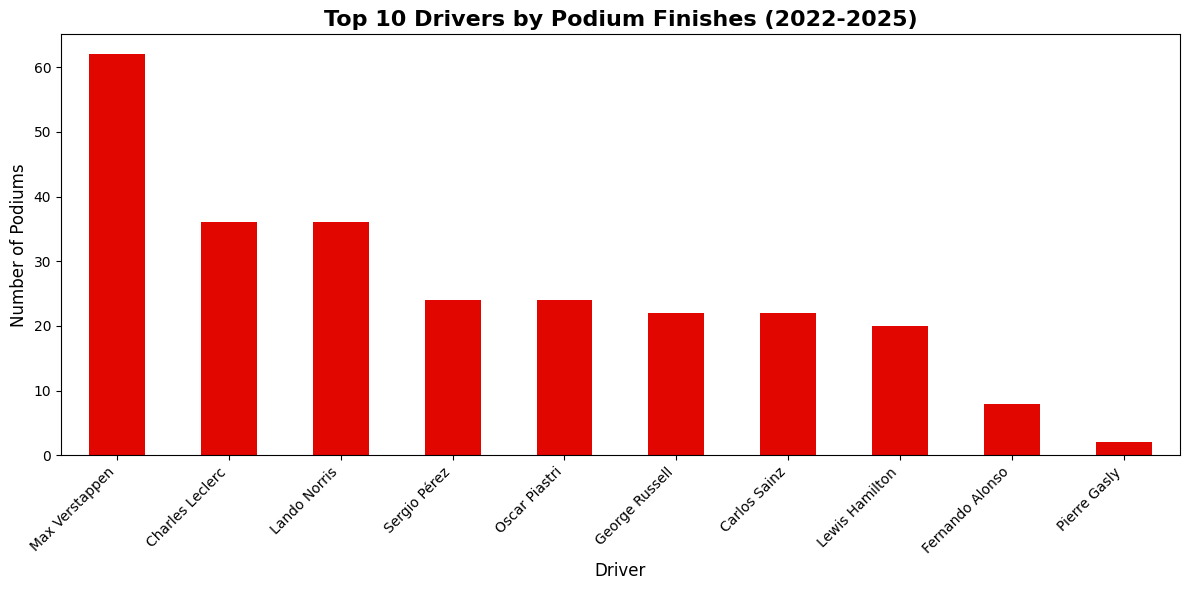

In [10]:
# Who finishes on podium most?
print("TOP 10 DRIVERS BY PODIUM FINISHES")
print("="*50)

# Use the correct column: 'podium_finish' (1 = podium, 0 = not podium)
podium_data = complete_features[complete_features['podium_finish'] == 1]

# Count podiums by driver (using givenName and familyName)
podium_data['driver_full_name'] = podium_data['givenName'] + ' ' + podium_data['familyName']
driver_podiums = podium_data['driver_full_name'].value_counts().head(10)

print(driver_podiums)

# Visualize it
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
driver_podiums.plot(kind='bar', color='#E10600')
plt.title('Top 10 Drivers by Podium Finishes (2022-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Driver', fontsize=12)
plt.ylabel('Number of Podiums', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

CONSTRUCTOR PERFORMANCE
constructorName
Red Bull          2355.0
Ferrari           1779.0
McLaren           1667.0
Mercedes          1621.0
Aston Martin       480.0
Alpine F1 Team     362.0
Williams           150.0
Haas F1 Team       135.0
RB F1 Team         108.0
Alfa Romeo          69.0
Sauber              63.0
AlphaTauri          57.0
Name: points, dtype: float64


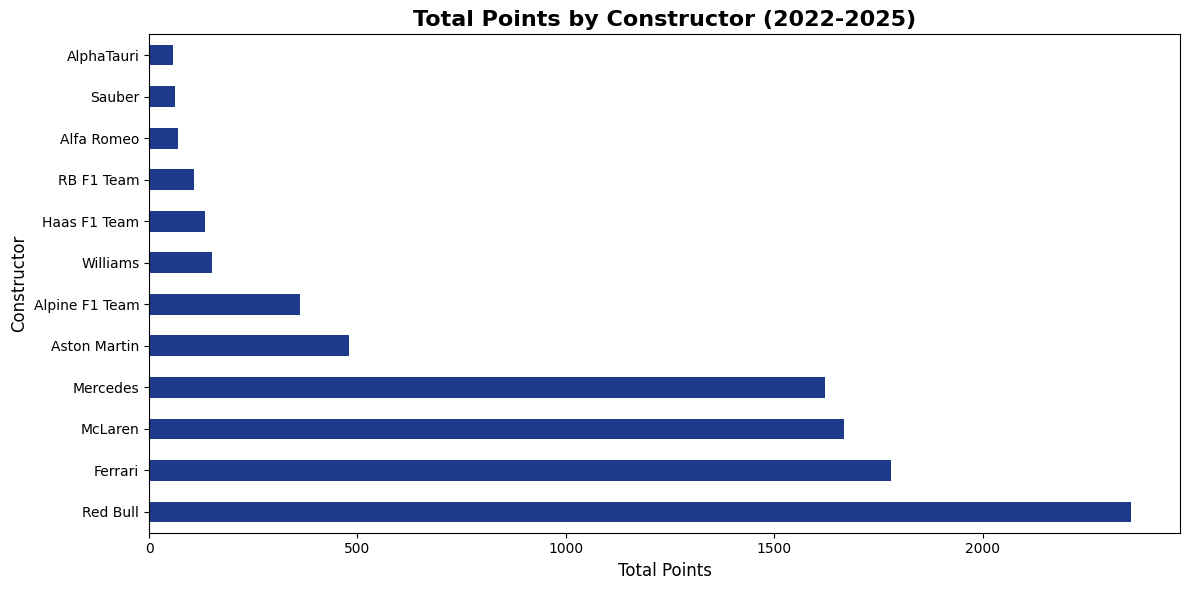

In [11]:
# Which teams (constructors) score most points?
print("CONSTRUCTOR PERFORMANCE")
print("="*50)

# Use constructorName and points columns
constructor_points = complete_features.groupby('constructorName')['points'].sum().sort_values(ascending=False)
print(constructor_points)

# Visualize
plt.figure(figsize=(12, 6))
constructor_points.plot(kind='barh', color='#1E3A8A')
plt.title('Total Points by Constructor (2022-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Total Points', fontsize=12)
plt.ylabel('Constructor', fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
# Let's understand what features exist
print("FEATURE CATEGORIES")
print("="*50)

all_features = complete_features.columns.tolist()

# Categorize features
qualifying_features = [f for f in all_features if 'quali' in f.lower() or 'grid' in f.lower() or f.startswith('Q')]
driver_features = [f for f in all_features if 'driver' in f.lower()]
constructor_features = [f for f in all_features if 'constructor' in f.lower()]
circuit_features = [f for f in all_features if 'circuit' in f.lower()]

print(f"\n📊 Qualifying-related features ({len(qualifying_features)}):")
for f in qualifying_features[:10]:
    print(f"   - {f}")

print(f"\n🏎️ Driver-related features ({len(driver_features)}):")
for f in driver_features[:10]:
    print(f"   - {f}")

print(f"\n🏭 Constructor-related features ({len(constructor_features)}):")
for f in constructor_features[:10]:
    print(f"   - {f}")

print(f"\n🏁 Circuit-related features ({len(circuit_features)}):")
for f in circuit_features[:10]:
    print(f"   - {f}")

print(f"\n📈 TOTAL FEATURES: {len(all_features)}")

FEATURE CATEGORIES

📊 Qualifying-related features (21):
   - grid
   - Q1
   - Q2
   - Q3
   - Q1_seconds
   - Q2_seconds
   - Q3_seconds
   - quali_best_time
   - quali_gap_to_pole
   - quali_gap_to_pole_pct

🏎️ Driver-related features (30):
   - driverId
   - driverNumber
   - driverCode
   - driverUrl
   - driverNationality
   - driver_last3_avg_points
   - driver_last3_avg_position
   - driver_last5_avg_points
   - driver_last5_avg_position
   - driver_season_points

🏭 Constructor-related features (16):
   - constructorId
   - constructorUrl
   - constructorName
   - constructorNationality
   - constructor_last3_avg_points
   - constructor_last5_avg_points
   - constructor_season_points
   - constructor_championship_position
   - constructor_total_dnf
   - constructor_total_races

🏁 Circuit-related features (14):
   - circuit_id
   - circuit_driver_wins
   - circuit_driver_podiums
   - circuit_driver_avg_finish
   - circuit_driver_experience
   - circuit_constructor_wins
   - circu

TARGET VARIABLE: podium_finish

Podium finish distribution:
podium_finish
0    1477
1     261
Name: count, dtype: int64

📊 15.02% of races result in podium (top 3)


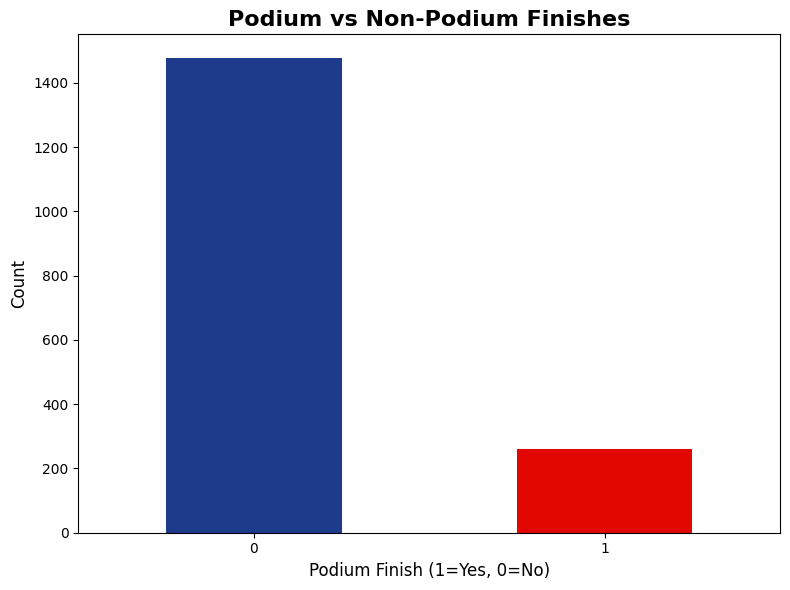

In [13]:
# What are we trying to predict?
print("TARGET VARIABLE: podium_finish")
print("="*50)

print("\nPodium finish distribution:")
print(complete_features['podium_finish'].value_counts())

podium_rate = (complete_features['podium_finish'].sum() / len(complete_features)) * 100
print(f"\n📊 {podium_rate:.2f}% of races result in podium (top 3)")

# Visualize
plt.figure(figsize=(8, 6))
complete_features['podium_finish'].value_counts().plot(kind='bar', color=['#1E3A8A', '#E10600'])
plt.title('Podium vs Non-Podium Finishes', fontsize=16, fontweight='bold')
plt.xlabel('Podium Finish (1=Yes, 0=No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Interesting statistics
print("🏁 INTERESTING STATS")
print("="*50)

# Win rate by driver
complete_features['driver_full_name'] = complete_features['givenName'] + ' ' + complete_features['familyName']

wins = complete_features[complete_features['is_win'] == 1]
print(f"\n🏆 Total wins in dataset: {len(wins)}")
print("\nTop 5 winners:")
print(wins['driver_full_name'].value_counts().head(5))

# DNF rate
dnf_rate = (complete_features['is_dnf'].sum() / len(complete_features)) * 100
print(f"\n⚠️ DNF (Did Not Finish) rate: {dnf_rate:.2f}%")

# Average grid position
print(f"\n🏁 Average starting grid position: {complete_features['grid_position'].mean():.2f}")
print(f"📍 Average finishing position: {complete_features['position'].mean():.2f}")

# Position changes
avg_change = complete_features['grid_position_change'].mean()
print(f"\n📈 Average grid position change: {avg_change:.2f}")
if avg_change > 0:
    print("   → Drivers tend to GAIN positions during races")
else:
    print("   → Drivers tend to LOSE positions during races")

🏁 INTERESTING STATS

🏆 Total wins in dataset: 87

Top 5 winners:
driver_full_name
Max Verstappen     48
Lando Norris        9
Oscar Piastri       9
Charles Leclerc     6
George Russell      5
Name: count, dtype: int64

⚠️ DNF (Did Not Finish) rate: 13.69%

🏁 Average starting grid position: 10.33
📍 Average finishing position: 10.49

📈 Average grid position change: 0.16
   → Drivers tend to GAIN positions during races


🏁 CIRCUIT DIFFICULTY ANALYSIS

Top 10 Most Challenging Circuits (Highest DNF Rate):
            total_dnf  total_races  dnf_rate
circuit_id                                  
2023_3              8           20      40.0
2022_2              7           20      35.0
2022_17             6           20      30.0
2023_20             6           20      30.0
2025_1              6           20      30.0
2022_10             6           20      30.0
2022_5              5           20      25.0
2023_15             5           20      25.0
2024_21             5           20      25.0
2023_19             5           20      25.0


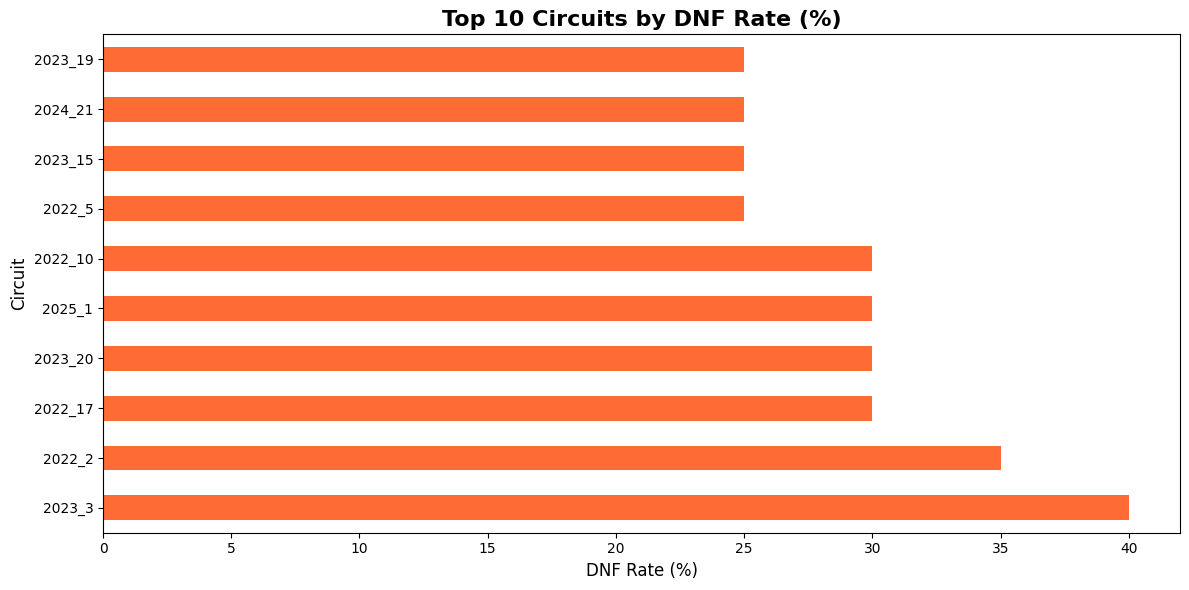

In [15]:
# Which circuits have most DNFs (Did Not Finish)?
print("🏁 CIRCUIT DIFFICULTY ANALYSIS")
print("="*50)

# Get circuit DNF rates
circuit_dnf = complete_features.groupby('circuit_id').agg({
    'is_dnf': 'sum',
    'driverId': 'count'
}).rename(columns={'is_dnf': 'total_dnf', 'driverId': 'total_races'})

circuit_dnf['dnf_rate'] = (circuit_dnf['total_dnf'] / circuit_dnf['total_races'] * 100)
circuit_dnf = circuit_dnf.sort_values('dnf_rate', ascending=False)

print("\nTop 10 Most Challenging Circuits (Highest DNF Rate):")
print(circuit_dnf.head(10))

# Visualize
plt.figure(figsize=(12, 6))
circuit_dnf['dnf_rate'].head(10).plot(kind='barh', color='#FF6B35')
plt.title('Top 10 Circuits by DNF Rate (%)', fontsize=16, fontweight='bold')
plt.xlabel('DNF Rate (%)', fontsize=12)
plt.ylabel('Circuit', fontsize=12)
plt.tight_layout()
plt.show()

📊 QUALIFYING vs RACE PERFORMANCE

Correlation between grid position and finish position:
               grid_position  position
grid_position       1.000000  0.608384
position            0.608384  1.000000


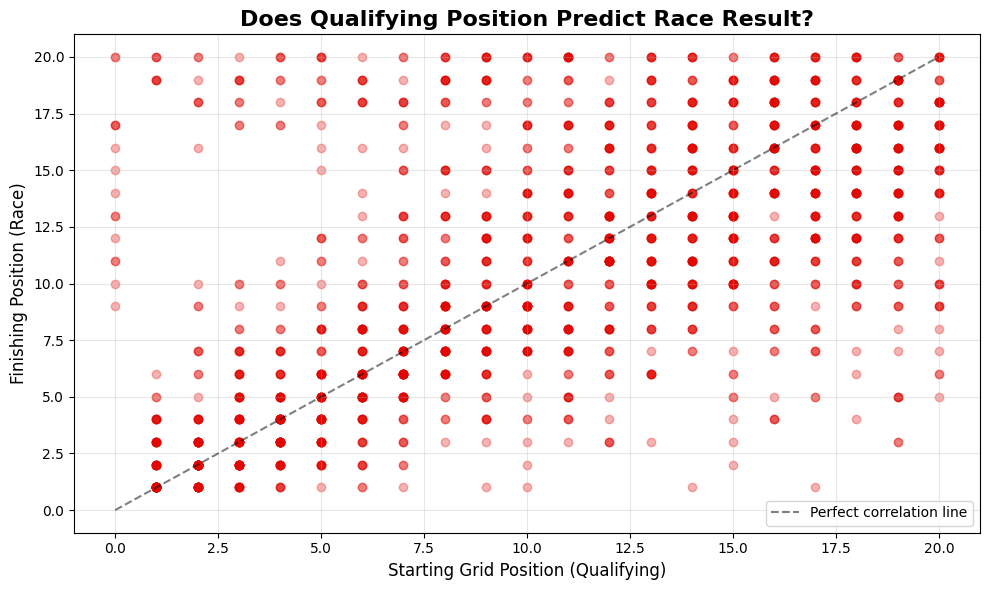


💡 Average position change: 0.16
   → Starting from position 10, drivers typically finish at position 10.2


In [16]:
# Does qualifying position predict race result?
print("📊 QUALIFYING vs RACE PERFORMANCE")
print("="*50)

# Calculate correlation
correlation = complete_features[['grid_position', 'position']].corr()
print("\nCorrelation between grid position and finish position:")
print(correlation)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(complete_features['grid_position'], 
            complete_features['position'], 
            alpha=0.3, 
            color='#E10600')
plt.xlabel('Starting Grid Position (Qualifying)', fontsize=12)
plt.ylabel('Finishing Position (Race)', fontsize=12)
plt.title('Does Qualifying Position Predict Race Result?', fontsize=16, fontweight='bold')
plt.plot([0, 20], [0, 20], 'k--', alpha=0.5, label='Perfect correlation line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Quick insight
avg_gain = complete_features['grid_position_change'].mean()
print(f"\n💡 Average position change: {avg_gain:.2f}")
print(f"   → Starting from position 10, drivers typically finish at position {10 + avg_gain:.1f}")

In [18]:
# Create summary report
summary = f"""
MY F1 DATA ANALYSIS - SESSION 1 COMPLETE
=========================================
Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}

📊 DATASET STATS:
- Total records: {len(complete_features):,}
- Unique drivers: {complete_features['driverId'].nunique()}
- Unique constructors: {complete_features['constructorName'].nunique()}
- Unique circuits: {complete_features['circuit_id'].nunique()}
- Date range: Season {complete_features['season'].min()} to {complete_features['season'].max()}

🏆 PODIUM STATS:
- Total podiums: {complete_features['podium_finish'].sum():,}
- Podium rate: {(complete_features['podium_finish'].mean() * 100):.2f}%
- Total wins: {complete_features['is_win'].sum():,}

⚠️ DNF STATS:
- Total DNFs: {complete_features['is_dnf'].sum():,}
- DNF rate: {(complete_features['is_dnf'].mean() * 100):.2f}%

📈 KEY INSIGHTS:
- Qualifying matters! Correlation with race result: {complete_features[['grid_position', 'position']].corr().iloc[0, 1]:.3f}
- Average grid position change: {complete_features['grid_position_change'].mean():.2f} positions
- Most challenging circuit: {circuit_dnf.index[0]} ({circuit_dnf.iloc[0]['dnf_rate']:.1f}% DNF rate)

✅ READY FOR PHASE 2: Feature Engineering & Model Building

NEXT STEPS:
1. Add weather data features
2. Create driver momentum indicators
3. Build neural network model
4. Add prediction confidence scoring
"""

# Save to file (use UTF-8 to support emojis/non-ASCII)
with open('session1_summary.txt', 'w', encoding='utf-8') as f:
    f.write(summary)

print(summary)
print("\n" + "="*50)
print("✅ PROGRESS SAVED to 'session1_summary.txt'")
print("🎯 You're ready for Phase 2 next time!")
print("="*50)


MY F1 DATA ANALYSIS - SESSION 1 COMPLETE
Date: 2025-12-14 09:46

📊 DATASET STATS:
- Total records: 1,738
- Unique drivers: 31
- Unique constructors: 12
- Unique circuits: 87
- Date range: Season 2022 to 2025

🏆 PODIUM STATS:
- Total podiums: 261
- Podium rate: 15.02%
- Total wins: 87

⚠️ DNF STATS:
- Total DNFs: 238
- DNF rate: 13.69%

📈 KEY INSIGHTS:
- Qualifying matters! Correlation with race result: 0.608
- Average grid position change: 0.16 positions
- Most challenging circuit: 2023_3 (40.0% DNF rate)

✅ READY FOR PHASE 2: Feature Engineering & Model Building

NEXT STEPS:
1. Add weather data features
2. Create driver momentum indicators
3. Build neural network model
4. Add prediction confidence scoring


✅ PROGRESS SAVED to 'session1_summary.txt'
🎯 You're ready for Phase 2 next time!
